In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/hongsukyi/Lectures/main/vds/vds.csv')

In [3]:
df.head()

,Date,ToVol,SmVol,MeVol,LaVol,Speed,Occ.Rate
0,2017-04-02 0:00,43,34,9,0,50.3,1.90
1,2017-04-02 0:05,45,32,13,0,58.9,1.84
2,2017-04-02 0:10,46,34,12,0,50.6,1.87
3,2017-04-02 0:15,45,36,9,0,50.9,1.72
4,2017-04-02 0:20,27,13,13,1,62.2,1.12


In [4]:
df.tail(3)

,Date,ToVol,SmVol,MeVol,LaVol,Speed,Occ.Rate
8061,2017-04-29 23:45,32,28,4,0,50.6,1.36
8062,2017-04-29 23:50,31,21,10,0,59.3,1.40
8063,2017-04-29 23:55,39,33,6,0,52.5,1.74


In [5]:
df.describe()

,ToVol,SmVol,MeVol,LaVol,Speed,Occ.Rate
count,8064.000000,8064.000000,8064.000000,8064.000000,8064.000000,8064.000000
mean,110.459945,79.353299,29.948537,1.158110,49.327431,6.166941
std,63.954451,46.802106,19.081136,1.530192,7.921856,6.739946
min,6.000000,2.000000,0.000000,0.000000,9.100000,0.230000
25%,50.000000,35.000000,13.000000,0.000000,44.900000,2.140000
50%,122.000000,87.000000,29.000000,1.000000,48.500000,5.550000
75%,155.000000,111.000000,44.000000,2.000000,54.200000,7.290000
max,338.000000,250.000000,145.000000,16.000000,87.800000,82.100000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8064 entries, 0 to 8063
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      8064 non-null   object 
 1   ToVol     8064 non-null   int64  
 2   SmVol     8064 non-null   int64  
 3   MeVol     8064 non-null   int64  
 4   LaVol     8064 non-null   int64  
 5   Speed     8064 non-null   float64
 6   Occ.Rate  8064 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 441.1+ KB


In [7]:
df.set_index('Date', inplace=True)

In [8]:
df.head()

,ToVol,SmVol,MeVol,LaVol,Speed,Occ.Rate
Date,,,,,,
2017-04-02 0:00,43,34,9,0,50.3,1.90
2017-04-02 0:05,45,32,13,0,58.9,1.84
2017-04-02 0:10,46,34,12,0,50.6,1.87
2017-04-02 0:15,45,36,9,0,50.9,1.72
2017-04-02 0:20,27,13,13,1,62.2,1.12


<AxesSubplot: xlabel='Date'>

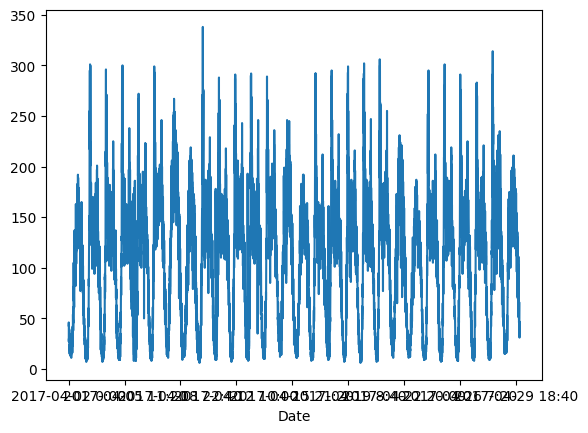

In [9]:
df['ToVol'].plot()

<AxesSubplot: xlabel='Date'>

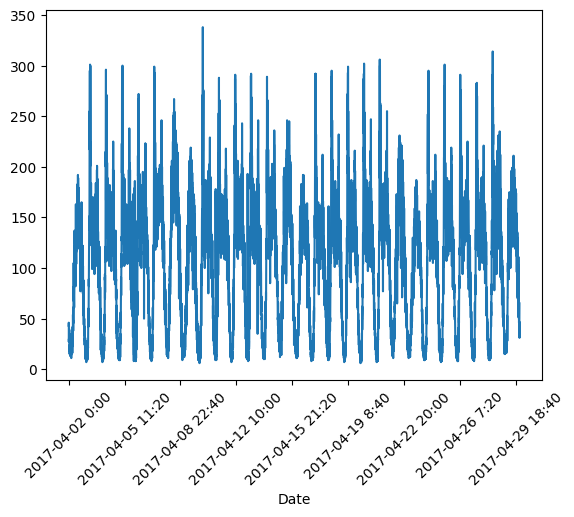

In [10]:
df['ToVol'].plot(rot=45)

<AxesSubplot: xlabel='Date'>

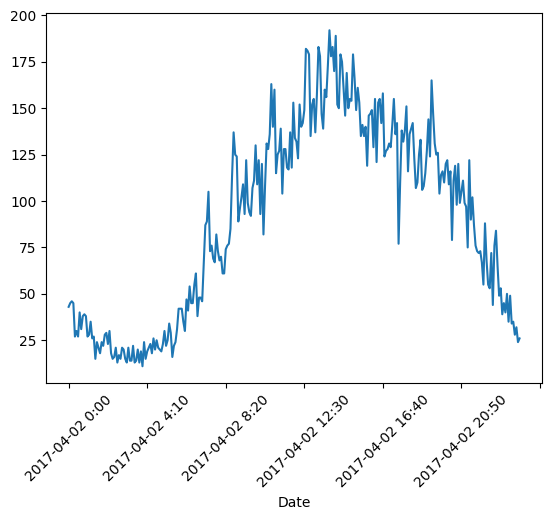

In [11]:
df['ToVol'][:288].plot(rot=45)

<AxesSubplot: xlabel='Date'>

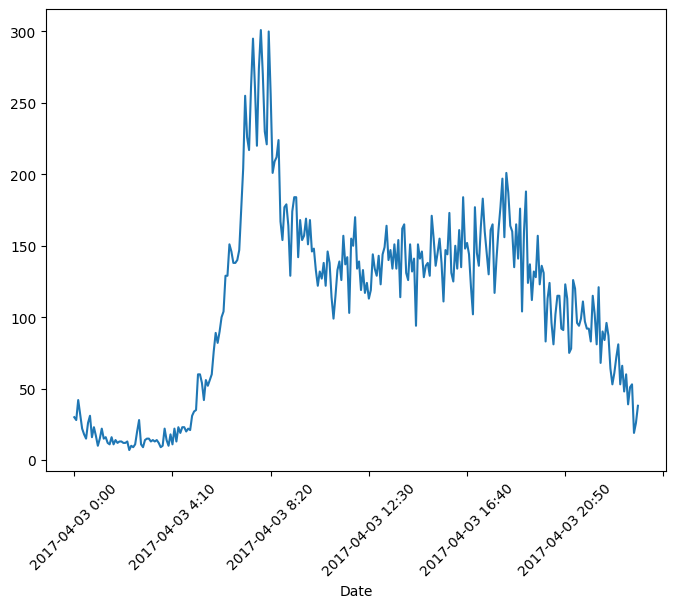

In [12]:
df['ToVol'][288:576].plot(rot=45,figsize=(8,6))

<AxesSubplot: xlabel='Date'>

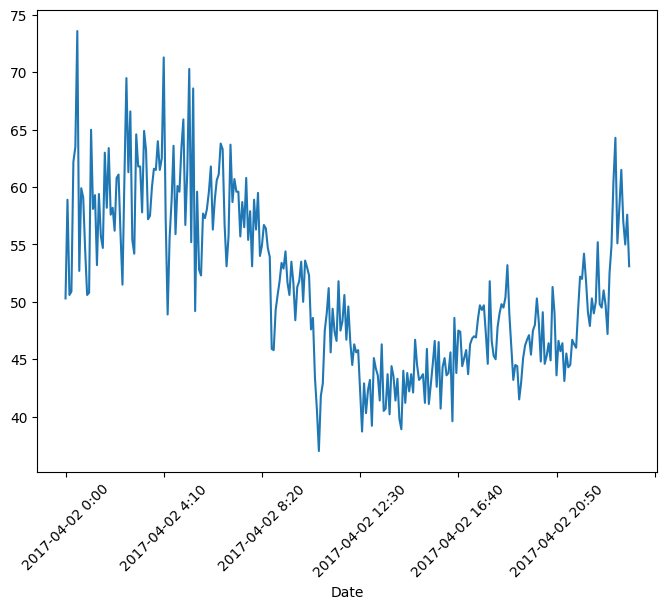

In [13]:
df['Speed'][:288].plot(rot=45,figsize=(8,6))

<AxesSubplot: xlabel='Date'>

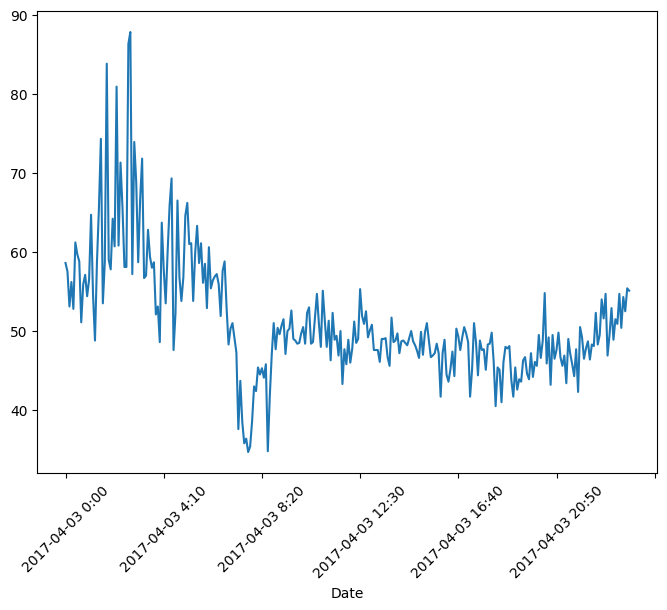

In [14]:
df['Speed'][288:576].plot(rot=45,figsize=(8,6))

<AxesSubplot: xlabel='Date'>

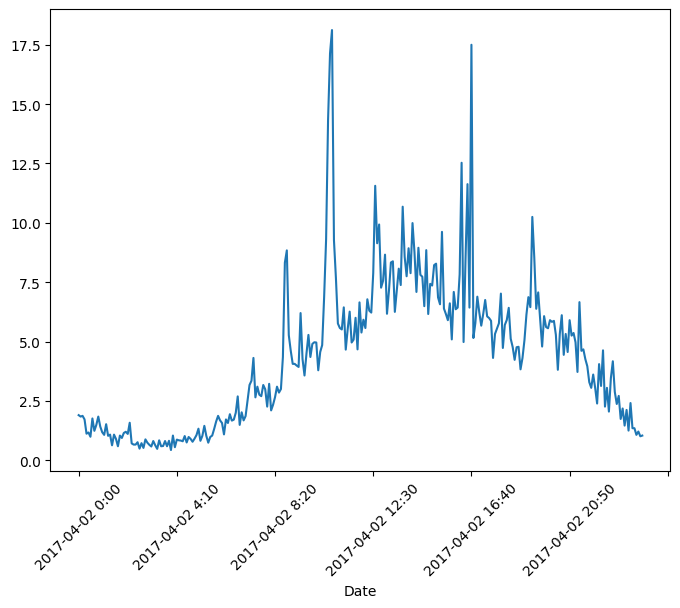

In [15]:
df['Occ.Rate'][:288].plot(rot=45,figsize=(8,6))

<AxesSubplot: xlabel='Date'>

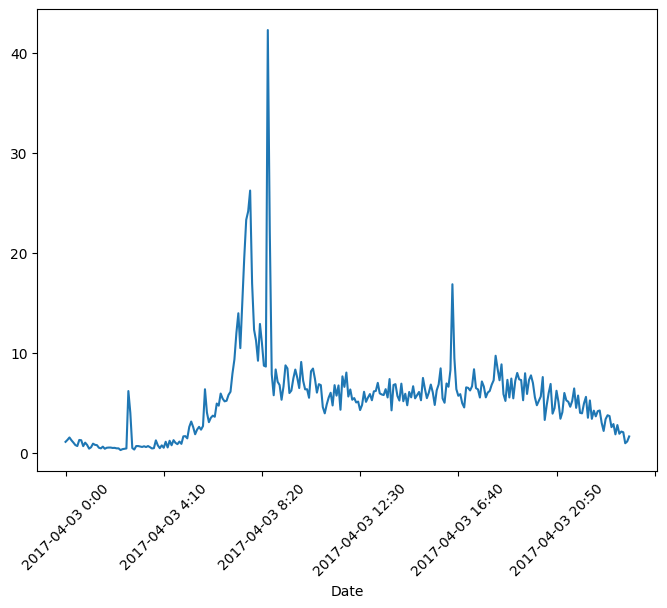

In [16]:
df['Occ.Rate'][288:576].plot(rot=45,figsize=(8,6))

### 2개의 클래스로 레이블링

In [55]:
num_classes = 2 
class_labels= ['Jam', 'Normal']

In [17]:
def get_score(speed):
    if speed < 45:
        label = 'Jam'
    else :
        label = 'Normal'
    return label

### 3개의 클래스로 레이블링

def get_score(speed):
    if speed < 45:
        label = 'Jam'
    elif speed < 50:
        label = 'Slow'
    else :
        label = 'Normal'
    return label

In [19]:
df["label_speed"] = df["Speed"].apply(lambda spd: get_score(spd))
df.head()

,ToVol,SmVol,MeVol,LaVol,Speed,Occ.Rate,label_speed
Date,,,,,,,
2017-04-02 0:00,43,34,9,0,50.3,1.90,Normal
2017-04-02 0:05,45,32,13,0,58.9,1.84,Normal
2017-04-02 0:10,46,34,12,0,50.6,1.87,Normal
2017-04-02 0:15,45,36,9,0,50.9,1.72,Normal
2017-04-02 0:20,27,13,13,1,62.2,1.12,Normal


In [20]:
df["label_speed"].unique()

array(['Normal', 'Jam'], dtype=object)

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: xlabel='Date', ylabel='Speed'>

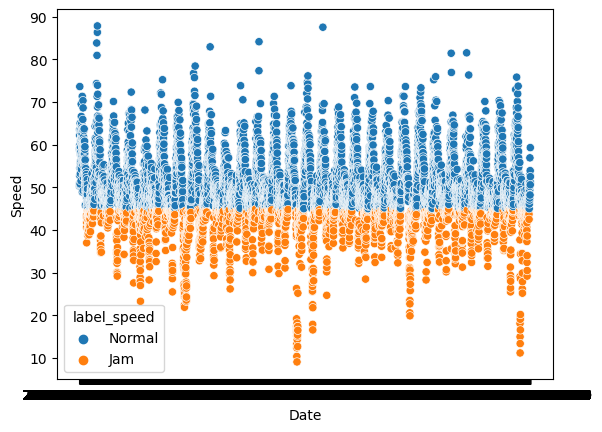

In [22]:
sns.scatterplot(data=df, x = 'Date', y = 'Speed', hue='label_speed')

<AxesSubplot: xlabel='Date', ylabel='Speed'>

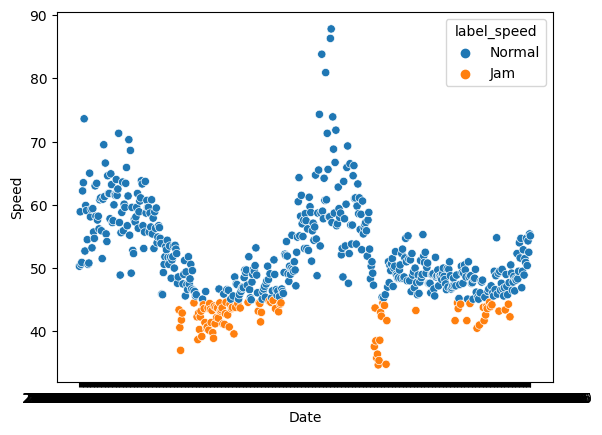

In [23]:
sns.scatterplot(data=df[:576], x = 'Date', y = 'Speed', hue='label_speed') 

<AxesSubplot: xlabel='Date', ylabel='ToVol'>

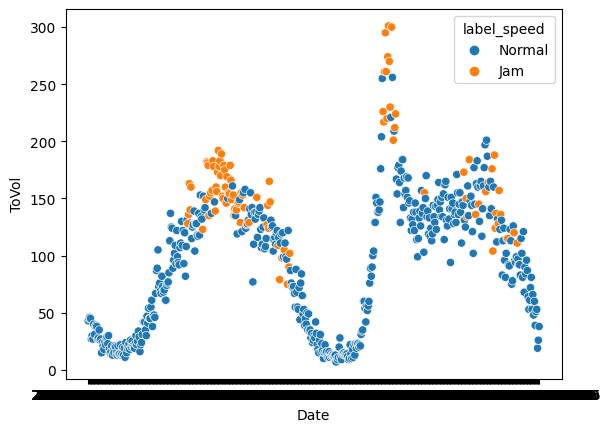

In [24]:
sns.scatterplot(data=df[:576], x = 'Date', y = 'ToVol', hue='label_speed') 

<AxesSubplot: xlabel='Date', ylabel='Occ.Rate'>

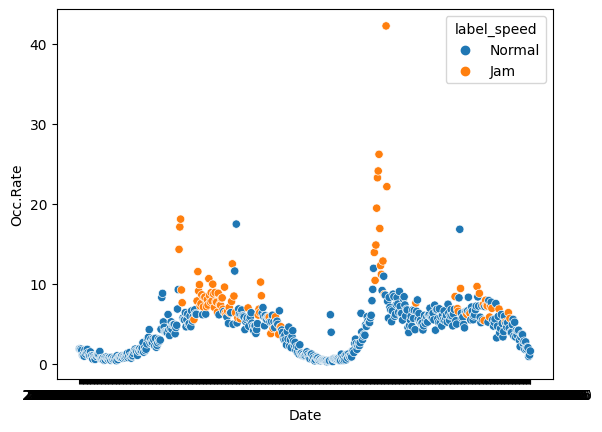

In [25]:
sns.scatterplot(data=df[:576], x = 'Date', y = 'Occ.Rate', hue='label_speed') 

array([[<AxesSubplot: title={'center': 'ToVol'}>]], dtype=object)

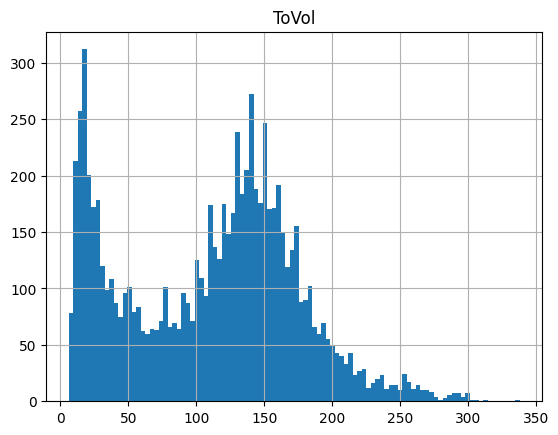

In [26]:
df.hist('ToVol',bins=100)

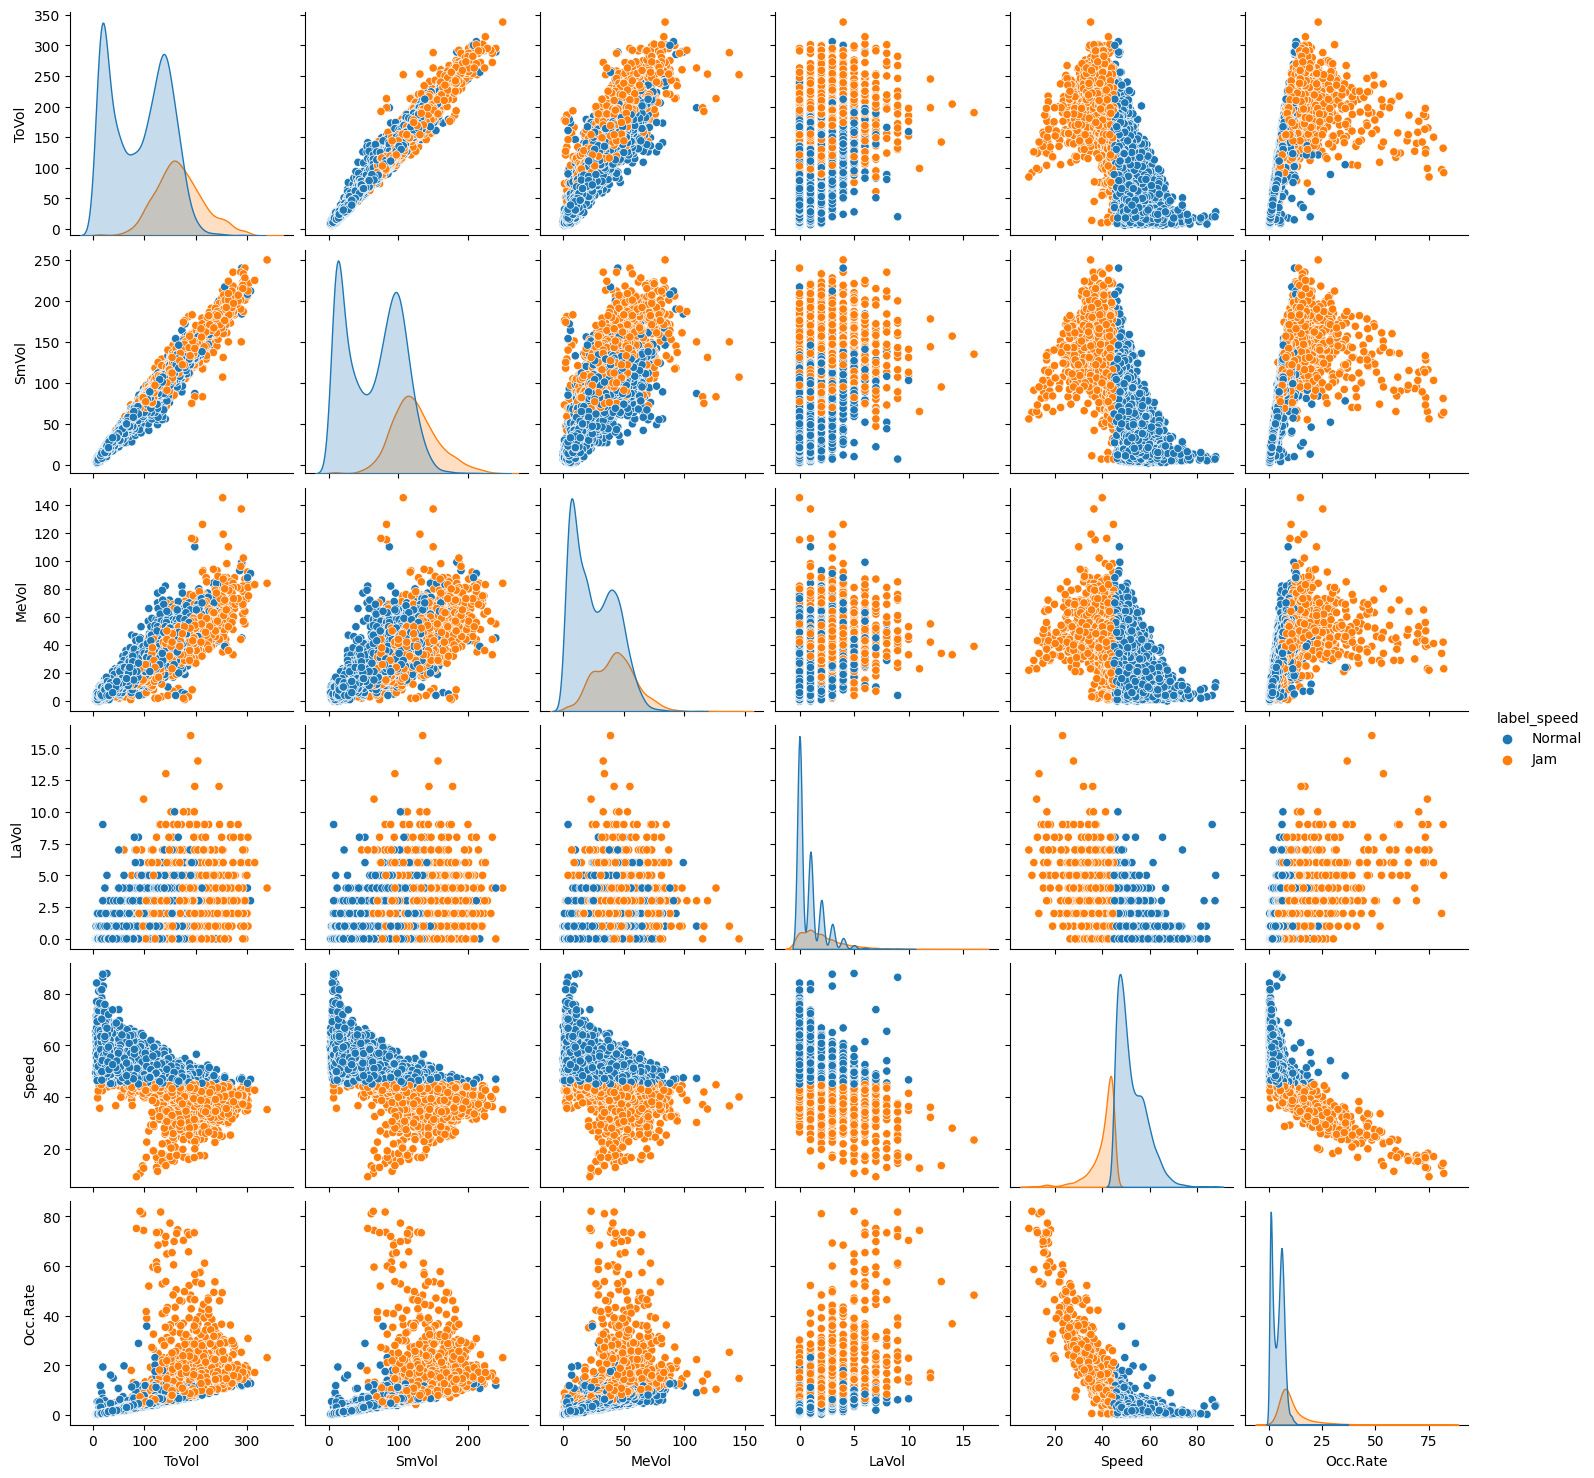

In [27]:
sns.pairplot(df, hue='label_speed')

C:\Users\admin\AppData\Local\Temp\ipykernel_5632\2438881507.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='YlGnBu')


<AxesSubplot: >

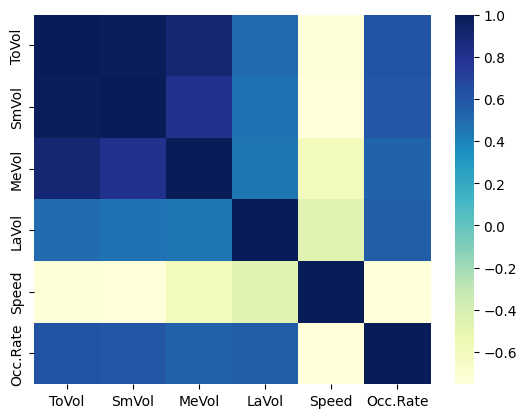

In [28]:
sns.heatmap(df.corr(), cmap='YlGnBu')

C:\Users\admin\AppData\Local\Temp\ipykernel_5632\3532720767.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True,  cmap='YlGnBu')


<AxesSubplot: >

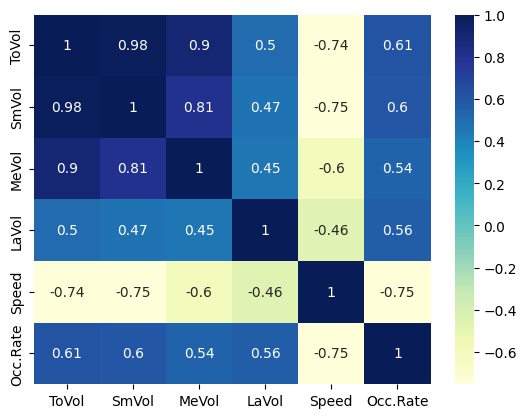

In [29]:
sns.heatmap(df.corr(), annot = True,  cmap='YlGnBu')

<AxesSubplot: xlabel='label_speed', ylabel='ToVol'>

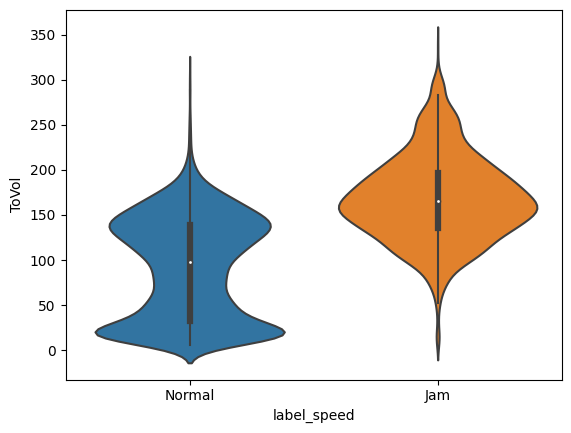

In [30]:
sns.violinplot(x='label_speed',y='ToVol',data=df)

<AxesSubplot: xlabel='label_speed', ylabel='Speed'>

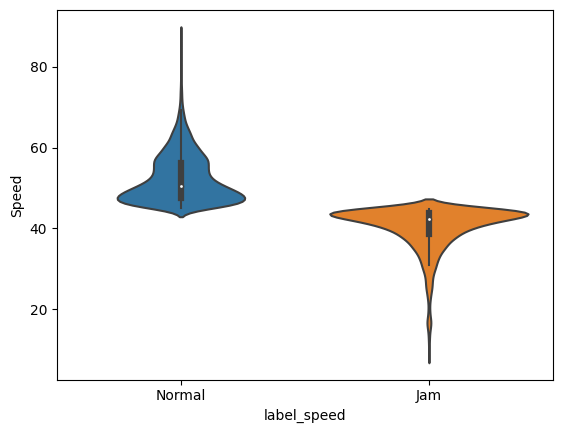

In [31]:
sns.violinplot(x='label_speed',y='Speed',data=df)

<AxesSubplot: xlabel='label_speed', ylabel='Occ.Rate'>

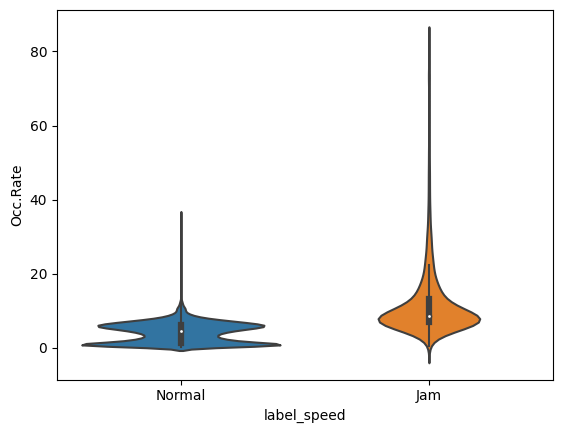

In [32]:
sns.violinplot(x='label_speed',y='Occ.Rate',data=df)

## 데이터 전처리를 위하여 sklearn을 사용하자

In [33]:
df.head()

,ToVol,SmVol,MeVol,LaVol,Speed,Occ.Rate,label_speed
Date,,,,,,,
2017-04-02 0:00,43,34,9,0,50.3,1.90,Normal
2017-04-02 0:05,45,32,13,0,58.9,1.84,Normal
2017-04-02 0:10,46,34,12,0,50.6,1.87,Normal
2017-04-02 0:15,45,36,9,0,50.9,1.72,Normal
2017-04-02 0:20,27,13,13,1,62.2,1.12,Normal


In [34]:
#class_dic = {'Jam':0, 'Slow':1, 'Normal':2}
class_dic = {'Jam':0, 'Normal':1}
df['label_speed'] = df['label_speed'].apply(lambda i : class_dic[i])
df.head()

,ToVol,SmVol,MeVol,LaVol,Speed,Occ.Rate,label_speed
Date,,,,,,,
2017-04-02 0:00,43,34,9,0,50.3,1.90,1
2017-04-02 0:05,45,32,13,0,58.9,1.84,1
2017-04-02 0:10,46,34,12,0,50.6,1.87,1
2017-04-02 0:15,45,36,9,0,50.9,1.72,1
2017-04-02 0:20,27,13,13,1,62.2,1.12,1


- Speed는 레이블 만들때 사용해서 feature에서 제외해보자 

In [35]:
features = ['ToVol','LaVol','MeVol','SmVol','Occ.Rate']
X = df[features]
y = df['label_speed']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)
print(X_train.shape, y_train.shape)
print(X_test.shape,  y_test.shape)

(6451, 5) (6451,)
(1613, 5) (1613,)


In [37]:
X_train

,ToVol,LaVol,MeVol,SmVol,Occ.Rate
Date,,,,,
2017-04-02 0:00,43,0,9,34,1.90
2017-04-02 0:05,45,0,13,32,1.84
2017-04-02 0:10,46,0,12,34,1.87
2017-04-02 0:15,45,0,9,36,1.72
2017-04-02 0:20,27,1,13,13,1.12
...,...,...,...,...,...
2017-04-24 9:10,119,1,29,89,4.58
2017-04-24 9:15,145,0,31,114,5.47
2017-04-24 9:20,165,2,44,119,7.90


In [38]:
X_test

,ToVol,LaVol,MeVol,SmVol,Occ.Rate
Date,,,,,
2017-04-24 9:35,151,2,42,107,7.67
2017-04-24 9:40,147,4,53,90,6.88
2017-04-24 9:45,152,1,49,102,8.36
2017-04-24 9:50,140,0,45,95,5.94
2017-04-24 9:55,173,2,61,110,8.36
...,...,...,...,...,...
2017-04-29 23:35,45,0,10,35,2.01
2017-04-29 23:40,47,0,14,33,1.89
2017-04-29 23:45,32,0,4,28,1.36


In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [40]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
X_train

array([[-1.03431236, -0.75262163, -1.06819167, -0.94977398, -0.61081493],
       [-1.0032784 , -0.75262163, -0.8617752 , -0.99216665, -0.61941343],
       [-0.98776142, -0.75262163, -0.91337932, -0.94977398, -0.61511418],
       ...,
       [ 0.85875951,  0.55781349,  0.73795251,  0.85191465,  0.24903504],
       [ 1.0449633 , -0.09740407,  1.04757722,  1.00028901,  0.57291187],
       [ 0.59497081,  1.86824862,  0.68634839,  0.47038059,  0.05126955]])

In [42]:
X_test

array([[ 0.64152176,  0.55781349,  0.63474427,  0.59755861,  0.21607413],
       [ 0.57945382,  1.86824862,  1.20238958,  0.23722088,  0.10286055],
       [ 0.65703874, -0.09740407,  0.9959731 ,  0.49157693,  0.31495687],
       ...,
       [-1.20499917, -0.75262163, -1.32621227, -1.076952  , -0.68820143],
       [-1.22051616, -0.75262163, -1.01658755, -1.22532635, -0.6824691 ],
       [-1.0963803 , -0.75262163, -1.22300403, -0.97097031, -0.63374426]])

In [43]:
print(X_train.shape)

(6451, 5)


In [44]:
print(X_train[1].shape)

(5,)


In [45]:
num_features = len(X_train[1])
print('number of features :', num_features)

number of features : 5


## Deep Neural Network

In [46]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, optimizers
from tensorflow.keras.layers import Flatten, Dense, Softmax

- binary classification 문제로, 마지막 Dense층에는 'sigmoid'를 사용해야한다.

In [76]:
num_neurons = 20
def model_mlp():
    model = Sequential([
        Dense(num_neurons, activation='relu', input_shape=[num_features]),
        Dense(num_classes, activation='sigmoid')
    ])    
    model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
    return model 

In [77]:
print('number of features (Input) : ',num_features)
print('number of classes (Output) : ', num_classes)
print('number of neurons (Hidden) : ', num_neurons)

number of features (Input) :  5
number of classes (Output) :  2
number of neurons (Hidden) :  20


In [78]:
print('(x+b)*w :', (num_features+1)*num_neurons)
print('(neurons+1)*classes:', (num_neurons+1)*num_classes)

(x+b)*w : 120
(neurons+1)*classes: 42


In [79]:
model = model_mlp()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 20)                120       
                                                                 
 dense_8 (Dense)             (None, 2)                 42        
                                                                 
Total params: 162
Trainable params: 162
Non-trainable params: 0
_________________________________________________________________


In [80]:
# !pip install livelossplot
from livelossplot import PlotLossesKeras

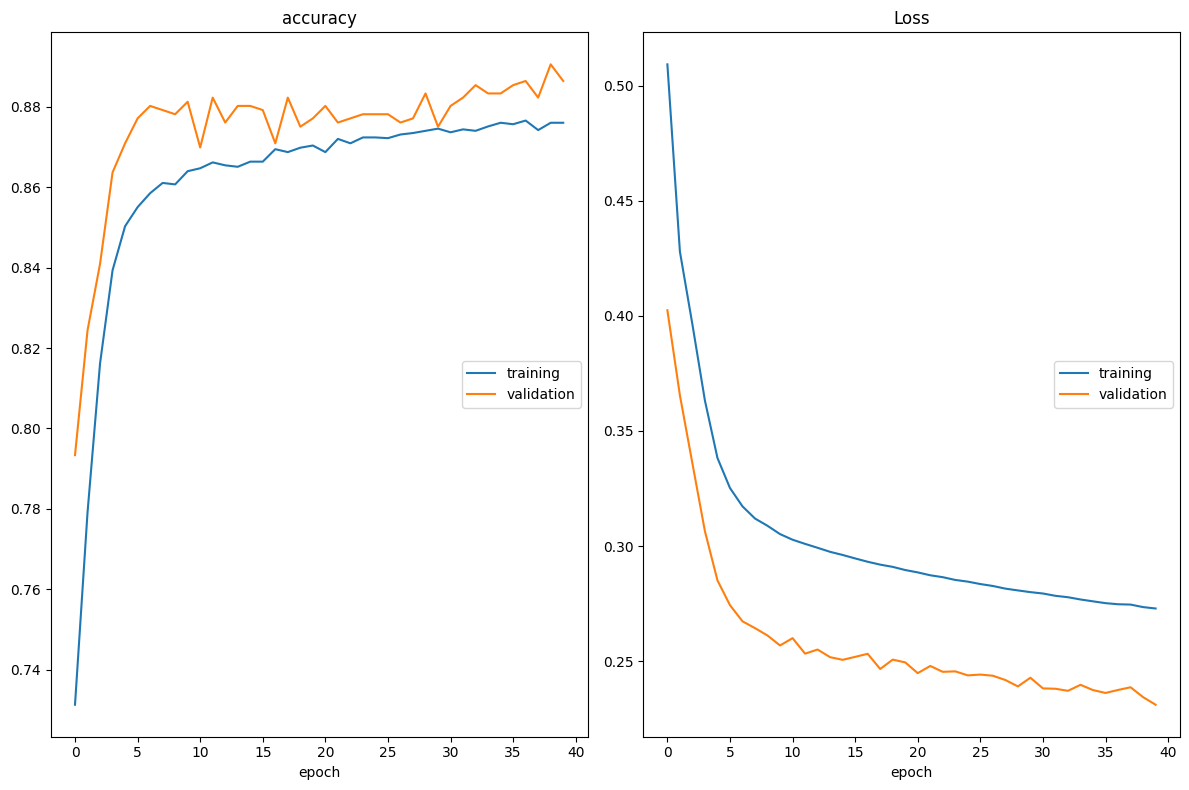

accuracy
	training         	 (min:    0.731, max:    0.877, cur:    0.876)
	validation       	 (min:    0.793, max:    0.890, cur:    0.886)
Loss
	training         	 (min:    0.273, max:    0.509, cur:    0.273)
	validation       	 (min:    0.231, max:    0.402, cur:    0.231)
86/86 [==============================] - 1s 9ms/step - loss: 0.2729 - accuracy: 0.8760 - val_loss: 0.2311 - val_accuracy: 0.8864


In [81]:
history = model.fit(X_train,y_train, epochs=40, 
                    validation_split=0.15,
                    batch_size=64,
                    callbacks=[PlotLossesKeras()])

In [82]:
model.evaluate(X_test,y_test)

51/51 [==============================] - 0s 2ms/step - loss: 0.3349 - accuracy: 0.8308


[0.3348623514175415, 0.8307501673698425]

In [83]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

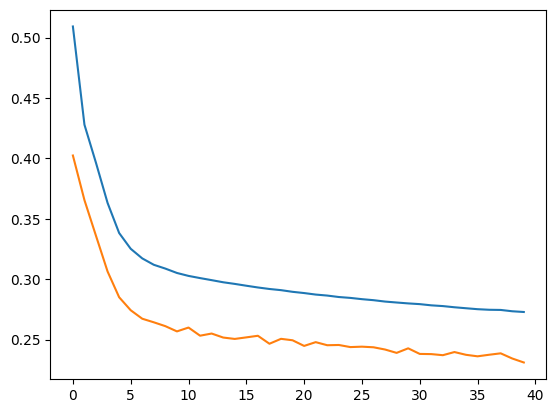

In [84]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

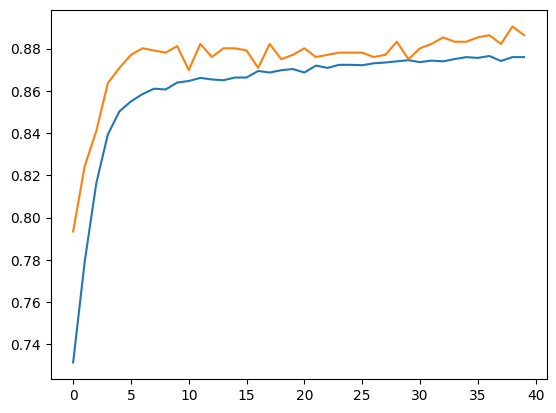

In [85]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [86]:
y_pred = model.predict(X_test)

51/51 [==============================] - 0s 1ms/step


<AxesSubplot: >

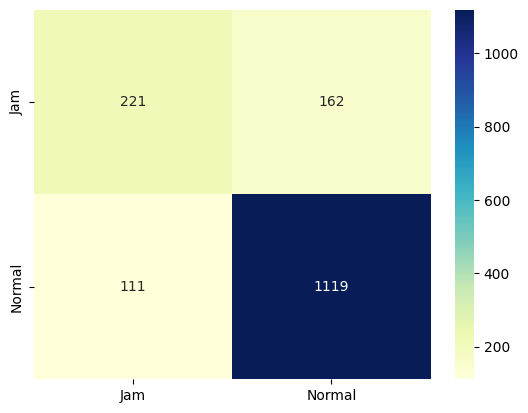

In [87]:
from sklearn.metrics import confusion_matrix
import numpy as np
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test,y_pred_labels)
sns.heatmap(cm , annot = True,  cmap='YlGnBu',
            fmt = 'd',xticklabels = class_labels, yticklabels = class_labels)